In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from NaiveBayesAC.naiveBayesAC import NaiveBayesAC as nbac
from NaiveBayesAC import utilsAC as nbutac

In [37]:
def apply_nv(X, y):
    train_x, train_y, test_x, test_y = nbutac.splitTrainTest(X, y, 0.7)
    nb_model = nbac()
    nb_model.fit(train_x, train_y)
    pred = nb_model.predict(test_x)
    print(f'Model accuracy: {nbutac.get_acc(test_y, pred)}')

### Data 1

In [38]:
data1 = pd.read_csv('data1.csv', header=None)
print(data1.shape)
data1.head()

(171, 4)


,0,1,2,3
0,1,1,2,1
1,1,1,5,1
2,1,1,6,1
3,1,2,1,-1
4,1,2,5,1


In [39]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]

data1_y.value_counts()

3
 1    98
-1    73
Name: count, dtype: int64

In [40]:
apply_nv(data1_x, data1_y)

Model accuracy: 0.9423076923076923


### Data 2

In [45]:
data2 = pd.read_csv('data2.csv', header=None)
print(data2.shape)
data2.head()

(218, 4)


,0,1,2,3
0,-49.841,14.4510,-42.9420,-1
1,-48.796,-45.8040,9.9935,1
2,-48.563,-22.6430,-32.5720,-1
3,-48.427,37.3230,-29.4660,-1
4,-48.310,3.5721,34.9960,-1


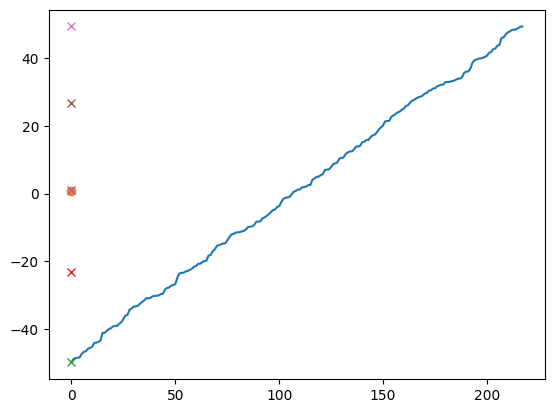

In [91]:
i = 0
plt.plot(data2[i])
plt.plot(data2[i].describe()['mean'], marker='o')
plt.plot(data2[i].describe()['min'], marker='x')
plt.plot(data2[i].describe()['25%'], marker='x')
plt.plot(data2[i].describe()['50%'], marker='x')
plt.plot(data2[i].describe()['75%'], marker='x')
plt.plot(data2[i].describe()['max'], marker='x')

### Data 3

In [49]:
data3 = pd.read_csv('data3.csv', header=None)
print(data3.shape)
data3.head()

(208, 4)


,0,1,2,3
0,12,10,28,0
1,13,10,27,0
2,14,8,28,0
3,14,12,24,0
4,14,13,23,0


In [55]:
data3_x = data3.iloc[:, :-1]
data3_y = data3.iloc[:, -1]

data3_y.value_counts()

3
1    120
0     88
Name: count, dtype: int64

In [64]:
apply_nv(data3_x, data3_y)

Model accuracy: 0.9047619047619048


### Mail classification 1

In [41]:
mail_data1_dict = {'Good to see you. Good day.': 'spam',
         'See the sky. See the little stars.': 'ham',
         'Nice picture. Nice, nice, frame.': 'ham',
         'See you. Good day.': 'spam'}

mail_data1_list = ['Good, nice, little stars.']

m_train1 = nbutac.text2df(mail_data1_dict)
m_test1 = nbutac.text2df(mail_data1_list)

m_train1_x = m_train1.iloc[:, :-1]
m_train1_y = m_train1.iloc[:, -1]

In [42]:
mail_model1 = nbac()
mail_model1.fit(m_train1_x, m_train1_y)
mail_pred1 = mail_model1.predict(m_test1)
mail_pred1 = ['spam' if i == 1 else 'ham' for i in mail_pred1]
for i in range(len(mail_pred1)):
    print(f'{mail_data1_list[i]} : {mail_pred1[i]}')

good nice little stars : ham


### Mail classification 2

In [43]:
mail_data2_dict = {'send us your internet banking password': 'spam', 
              'send us your mobile number': 'ham',
              'change your internet banking password': 'ham',
              'change your userid': 'spam', 
              'send your internet banking password': 'spam',
              'send us your account details': 'spam'}

mail_data2_list = ['change your account number', 'send your address']

m_train2 = nbutac.text2df(mail_data2_dict)
m_test2 = nbutac.text2df(mail_data2_list)

m_train2_x = m_train2.iloc[:, :-1]
m_train2_y = m_train2.iloc[:, -1]

In [44]:
mail_model2 = nbac()
mail_model2.fit(m_train2_x, m_train2_y)
mail_pred2 = mail_model2.predict(m_test2)
mail_pred2 = ['spam' if i == 1 else 'ham' for i in mail_pred2]
for i in range(len(mail_pred2)):
    print(f'{mail_data2_list[i]} : {mail_pred2[i]}')

change your account number : ham
send your address : spam
